In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('vehicle.csv')

In [3]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


# Handling Missing values and outliers

In [6]:
df['class'].unique()

df_f=df.drop(['class'],axis=1)

In [7]:
def impute(col,vmean):
    
    if pd.isna(col):
        
        return np.round(vmean)
    else:
        return col

    
for colname in df_f.columns:
    df_f[colname]=df_f.apply(lambda x: impute(x[colname],df_f[colname].mean()),axis=1)



In [8]:
df_f.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
compactness                    846 non-null float64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_rat

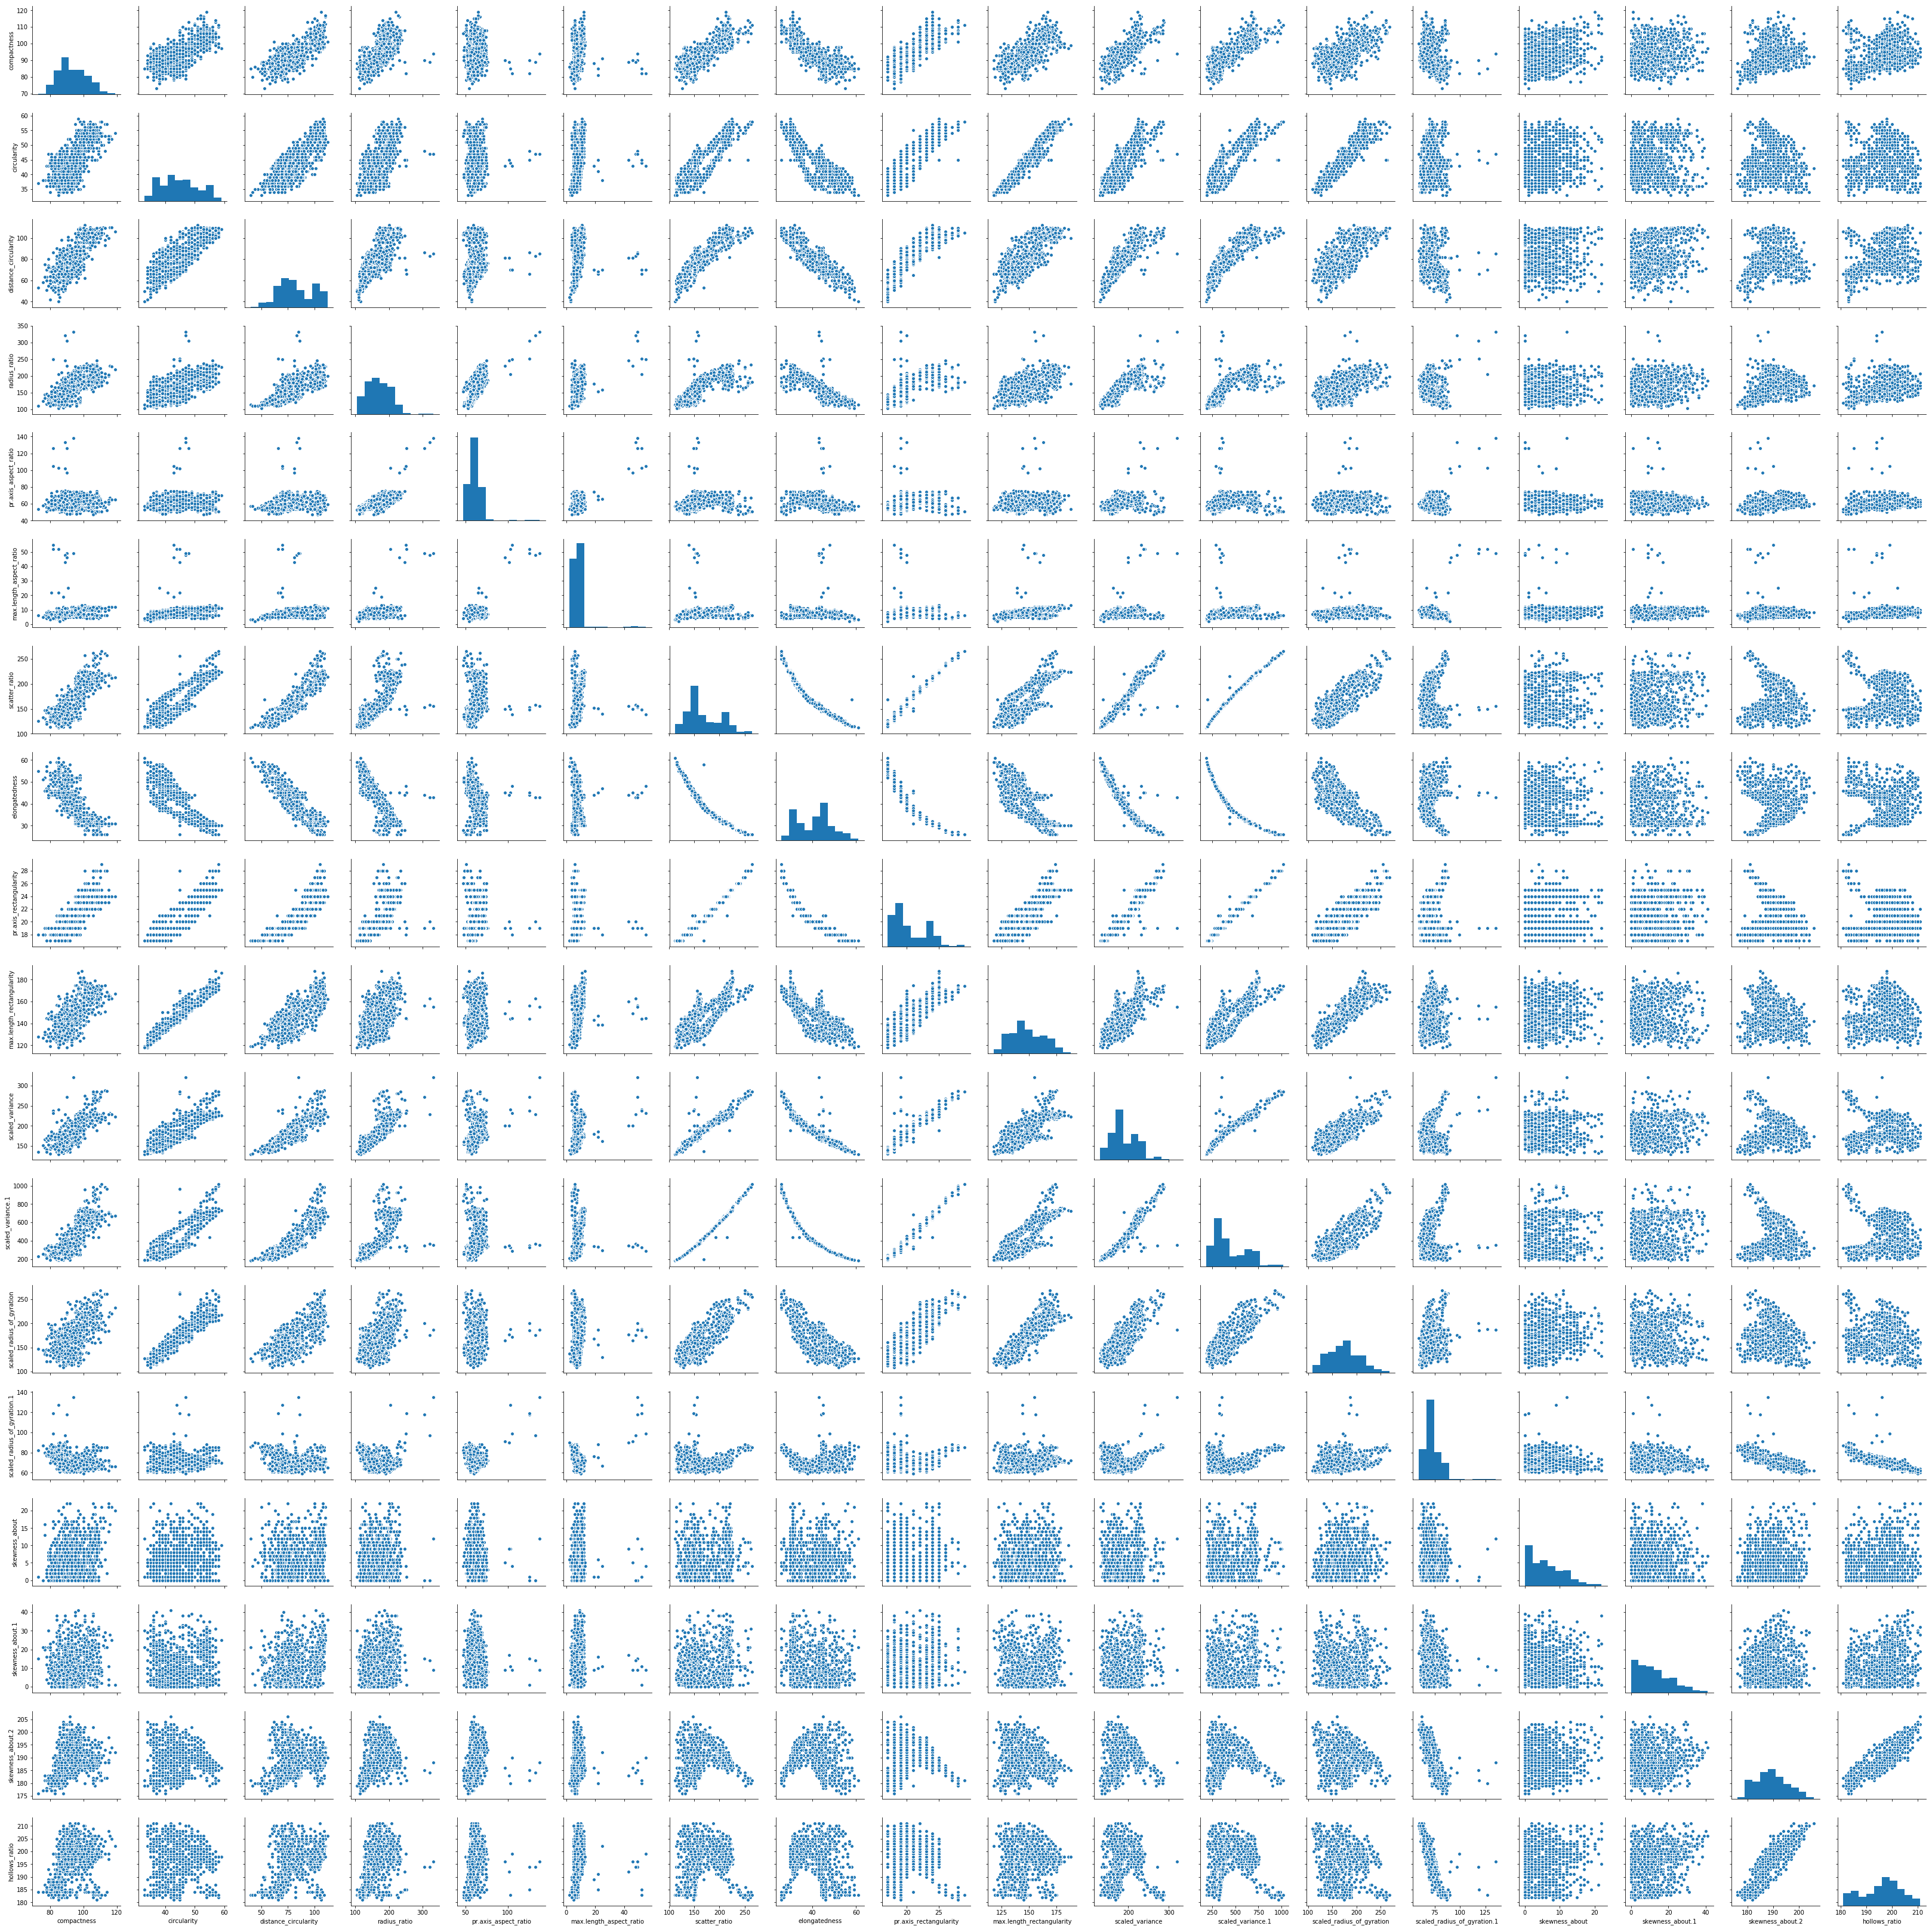

In [9]:
sns.pairplot(df_f)

In [7]:
df_f.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.685523,0.789912,0.689845,0.091784,0.148249,0.812231,-0.788647,0.813505,0.676143,0.762792,0.815890,0.585135,-0.249847,0.236078,0.157478,0.298525,0.365552
circularity,0.685523,1.000000,0.793115,0.620932,0.153345,0.251151,0.848386,-0.822042,0.845463,0.962059,0.796966,0.838719,0.927098,0.053039,0.144567,-0.011929,-0.105858,0.045104
distance_circularity,0.789912,0.793115,1.000000,0.767111,0.158457,0.264558,0.904394,-0.911434,0.893044,0.774664,0.861992,0.887321,0.705931,-0.225686,0.114191,0.265638,0.145575,0.332129
radius_ratio,0.689845,0.620932,0.767111,1.000000,0.663657,0.450035,0.734240,-0.789811,0.707950,0.569219,0.794065,0.720158,0.536521,-0.180621,0.048971,0.173877,0.382120,0.471259
pr.axis_aspect_ratio,0.091784,0.153345,0.158457,0.663657,1.000000,0.648691,0.103795,-0.183361,0.079190,0.127231,0.273510,0.089701,0.122196,0.152900,-0.058393,-0.032222,0.239878,0.267722
max.length_aspect_ratio,0.148249,0.251151,0.264558,0.450035,0.648691,1.000000,0.165965,-0.180044,0.161638,0.305943,0.318952,0.143710,0.189694,0.295653,0.015599,0.043505,-0.026188,0.143919
scatter_ratio,0.812231,0.848386,0.904394,0.734240,0.103795,0.165965,1.000000,-0.970717,0.989350,0.808349,0.948294,0.993772,0.799249,-0.027844,0.074432,0.213211,0.005148,0.118445
elongatedness,-0.788647,-0.822042,-0.911434,-0.789811,-0.183361,-0.180044,-0.970717,1.000000,-0.949055,-0.775531,-0.936716,-0.955070,-0.766025,0.103371,-0.052271,-0.185754,-0.114716,-0.216725
pr.axis_rectangularity,0.813505,0.845463,0.893044,0.707950,0.079190,0.161638,0.989350,-0.949055,1.000000,0.811725,0.934477,0.989452,0.797275,-0.015435,0.082830,0.214562,-0.019121,0.099112
max.length_rectangularity,0.676143,0.962059,0.774664,0.569219,0.127231,0.305943,0.808349,-0.775531,0.811725,1.000000,0.745213,0.796010,0.866418,0.041410,0.135852,0.001731,-0.104280,0.076770


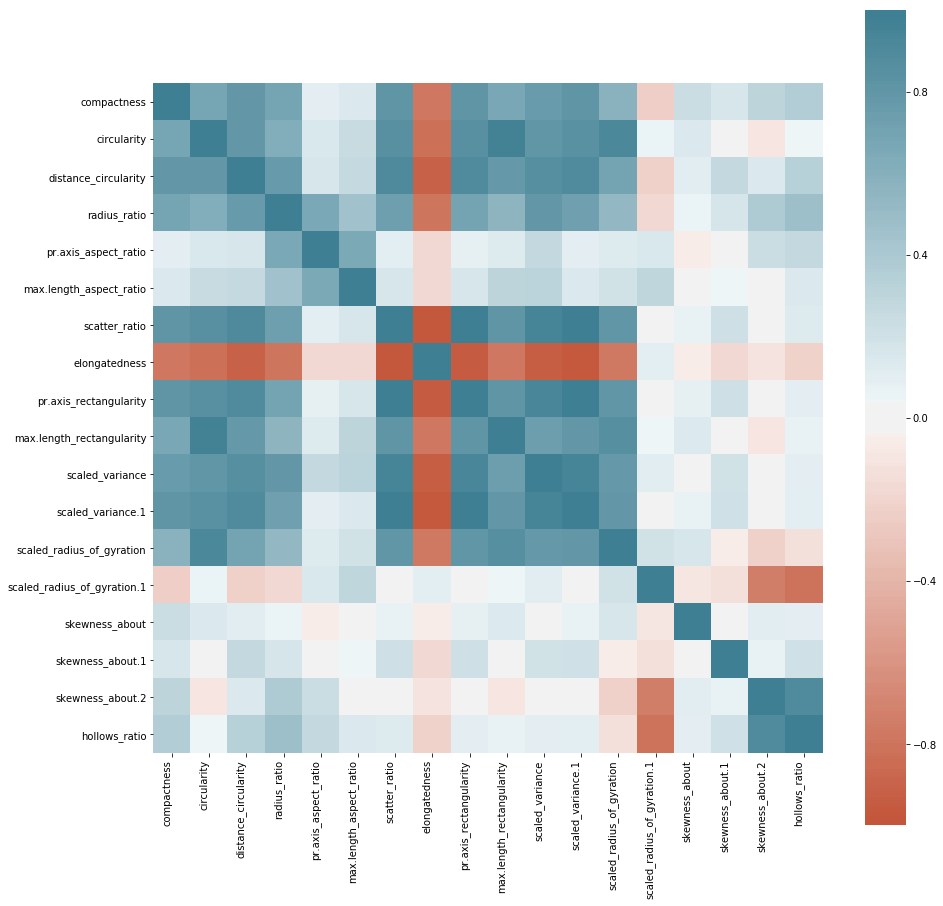

In [22]:
corr = df_f.corr()
fig, ax = plt.subplots(figsize=(15,15))    
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);


# Dropping unwanted features

In [16]:
print('Set threshold of correlataion as 0.90')
# Create correlation matrix
corr_matrix = df_f.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [17]:
to_drop

['scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration']

In [18]:
 #['scatter_ratio',
 #'elongatedness',
 #'pr.axis_rectangularity',
 #'max.length_rectangularity',
 #'scaled_variance',
 #'scaled_variance.1',
 #'scaled_radius_of_gyration']
print('Dropping the highly correlated values as mentioned above')

Dropping the highly correlated values as mentioned above


In [25]:
df_pca=df_f.drop(['scatter_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration'],axis=1)

In [26]:
df_pca.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95.0,48.0,83.0,178.0,72.0,10.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,127.0,9.0,11.0,180.0,183.0


# Apply PCA

In [ ]:
## Normalizing data to hanlde outliers

In [27]:
##Standardize the variables

from scipy.stats import zscore


#for col in cancer.columns:
    #print(col)
    #print(cancer[col].unique())

df_pca=df_pca.apply(zscore)

#for col in df_final.columns:
 #   print(col)
  #  print(df_final[col].unique())

In [28]:
from sklearn.decomposition import PCA
# You can also use np.cov(cancerDF.T)

covtest=np.cov(df_pca.T)

print(np.linalg.eig(covtest)[0])
np.linalg.eig(covtest)[1]

[4.03841019 2.39356161 1.63504898 1.06838709 0.8816548  0.39862719
 0.27230608 0.14864968 0.0966634  0.0309091  0.04879963]


array([[-0.39944787, -0.09356693,  0.32027892,  0.04815161,  0.04911649,
         0.07037885, -0.72903592, -0.07106723, -0.39323566, -0.11577107,
         0.12183064],
       [-0.31255598, -0.34644737,  0.31936326,  0.08726671,  0.19996619,
        -0.08760318,  0.35456012,  0.68482101, -0.126091  , -0.03569342,
        -0.11466543],
       [-0.41157855, -0.18340897,  0.28408958, -0.13851433,  0.0704097 ,
        -0.13917734,  0.21421468, -0.42980021,  0.51529424, -0.35209968,
         0.22940094],
       [-0.45017352, -0.16537289, -0.12409373, -0.03886789,  0.08990012,
         0.36376355,  0.07654602, -0.2567736 ,  0.07426406,  0.64342238,
        -0.34839662],
       [-0.22813783, -0.20252433, -0.59752021,  0.08225584, -0.01590081,
         0.43722707,  0.1897094 , -0.00627773, -0.2685558 , -0.42686356,
         0.24770239],
       [-0.1912157 , -0.3321481 , -0.44963757,  0.02966587, -0.23309905,
        -0.70919665, -0.14485716, -0.04931318, -0.04581786, -0.00807167,
        -0.259

In [29]:
sum_eigen_val=np.sum(np.linalg.eig(covtest)[0])

eigen_val=np.linalg.eig(covtest)[0]

eigen_val_cum=0;
explained_variance=[];



for i in range(len(np.linalg.eig(covtest)[0])):
    #print(eigen_val[i]);
    eigen_val_cum= eigen_val_cum + eigen_val[i] 
    eigen_val_prcnt = (eigen_val[i]  / sum_eigen_val) * 100
    #print(eigen_val_prcnt)
    explained_variance.append(eigen_val_prcnt)
    eigen_val_prcnt_cum = (eigen_val_cum / sum_eigen_val) * 100
    print(i,eigen_val[i] ,eigen_val_prcnt,eigen_val_cum,eigen_val_prcnt_cum )

0 4.038410190950713 36.669424149509474 4.038410190950713 36.669424149509474
1 2.3935616064718324 21.733930340304084 6.431971797422545 58.403354489813566
2 1.6350489807832937 14.846511807026468 8.067020778205839 73.24986629684003
3 1.0683870939829392 9.701129318886563 9.135407872188779 82.9509956157266
4 0.8816547950313921 8.005569544396371 10.017062667220172 90.95656516012298
5 0.39862718672402225 3.6195999654179967 10.415689853944194 94.57616512554098
6 0.2723060826645406 2.472583707839424 10.687995936608734 97.04874883338039
7 0.14864967836622373 1.3497633593322482 10.836645614974959 98.39851219271264
8 0.09666340157227764 0.8777194748396153 10.933309016547236 99.27623166755227
9 0.030909103254625033 0.28065970610528856 10.964218119801862 99.55689137365755
10 0.048799631677431204 0.4431086263424604 11.013017751479293 100.00000000000003


In [30]:
print(explained_variance)

[36.669424149509474, 21.733930340304084, 14.846511807026468, 9.701129318886563, 8.005569544396371, 3.6195999654179967, 2.472583707839424, 1.3497633593322482, 0.8777194748396153, 0.28065970610528856, 0.4431086263424604]


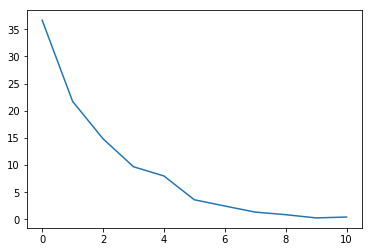

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

plt.plot(explained_variance)
plt.show()

In [45]:
print("For n_component of 6 we get percentage greater than 95%")
pca = PCA(n_components=6)
pca.fit(df_pca)
print("Below are the eigen vectors")
pca.components_

For n_component of 6 we get percentage greater than 95%
Below are the eigen vectors


array([[-0.39944787, -0.31255598, -0.41157855, -0.45017352, -0.22813783,
        -0.1912157 ,  0.22687672, -0.09277735, -0.12125236, -0.28775523,
        -0.35284679],
       [ 0.09356693,  0.34644737,  0.18340897,  0.16537289,  0.20252433,
         0.3321481 ,  0.52724924, -0.03034638, -0.06328115, -0.46195698,
        -0.40320284],
       [-0.32027892, -0.31936326, -0.28408958,  0.12409373,  0.59752021,
         0.44963757,  0.10341475, -0.223892  , -0.08394083,  0.19983897,
         0.17976127],
       [ 0.04815161,  0.08726671, -0.13851433, -0.03886789,  0.08225584,
         0.02966587, -0.00296185,  0.62625607, -0.74520763,  0.11906659,
         0.00249563],
       [-0.04911649, -0.19996619, -0.0704097 , -0.08990012,  0.01590081,
         0.23309905,  0.12897243,  0.71696887,  0.59791205, -0.03986025,
         0.01440917],
       [-0.07037885,  0.08760318,  0.13917734, -0.36376355, -0.43722707,
         0.70919665, -0.20010037, -0.10361912, -0.1263104 , -0.1228644 ,
         0.244

In [33]:
print("Below are the eigen values")
pca.explained_variance_

Below are the eigen values


array([4.03841019, 2.39356161, 1.63504898, 1.06838709, 0.8816548 ,
       0.39862719])

In [37]:
(sum(pca.explained_variance_[0:5])) / sum(pca.explained_variance_)

0.9617282011740134

In [42]:
principaldf=pd.DataFrame(pca.components_,columns=df_pca.columns)

print(df_pca.columns.shape)
print(pca.components_.shape)
principaldf

(11,)
(6, 11)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.399448,-0.312556,-0.411579,-0.450174,-0.228138,-0.191216,0.226877,-0.092777,-0.121252,-0.287755,-0.352847
1,0.093567,0.346447,0.183409,0.165373,0.202524,0.332148,0.527249,-0.030346,-0.063281,-0.461957,-0.403203
2,-0.320279,-0.319363,-0.284090,0.124094,0.597520,0.449638,0.103415,-0.223892,-0.083941,0.199839,0.179761
3,0.048152,0.087267,-0.138514,-0.038868,0.082256,0.029666,-0.002962,0.626256,-0.745208,0.119067,0.002496
4,-0.049116,-0.199966,-0.070410,-0.089900,0.015901,0.233099,0.128972,0.716969,0.597912,-0.039860,0.014409
5,-0.070379,0.087603,0.139177,-0.363764,-0.437227,0.709197,-0.200100,-0.103619,-0.126310,-0.122864,0.244385


# Using SVM to predict the target

In [43]:
from sklearn import svm

In [51]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X=pca.transform(df_pca)
y=df['class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [52]:
X.shape

(846, 6)

# Applying GridSearch and passing hyper parameters

In [59]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import svm, grid_search

parameters = {'kernel':['linear','rbf'], 'C':[0.01, 0.05, 0.5, 1]}
#grid_search = GridSearchCV(SVC(), param_grid=parameters, cv=3,refit = True, verbose=2)
#grid_search.fit(features, target)

#dt_grid={'max_depth':[3,4,5,6,7,8],'criterion':['entropy','gini'],'min_samples_leaf':[1,2,3]}
grid_classifier=GridSearchCV(svm.SVC(),parameters,cv=5)
grid_classifier.fit(X_train, y_train)

print(grid_classifier.best_params_)
print(grid_classifier.best_score_)

#print('The best parameters are {\'criterion:' 'entropy', 'max_depth\': 4, \'min_samples_leaf\': 1}')

{'C': 1, 'kernel': 'rbf'}
0.8653846153846154


In [60]:
all_accuracies = cross_val_score(estimator=grid_classifier, X=X_train, y=y_train, cv=5)

In [61]:
print(all_accuracies)

[0.85294118 0.90441176 0.85925926 0.86666667 0.84328358]
